# Free Response of a Single Degree of Freedom System

In this Notebook we investiage the impact of various parameters on the response of a single mass-damper-spring system. 

$$
m\ddot{x} +c\dot{x}+kx=0
$$

Here m, c, and k are the mass, damping, and stiffness in consistent units. 

In [5]:
## Imports

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy.

In [6]:
%matplotlib inline

In [7]:
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation ($\sigma$, $\beta$, $\rho$), the numerical integration (`N`, `max_time`) and the visualization (`angle`).

In [79]:
def solve_sdofs(m=10, c=1, k=100,x0=1,v0=-1, max_time=10):

    #fig = plt.figure()
    #ax = fig.add_axes([0, 0, 1, 1])#, autoscale_on,projection='2d')
    #ax.axis('off')

    # prepare the axes limits
    #ax.set_xlim((-25, 25))
    #ax.set_ylim((-35, 35))
    #ax.set_zlim((5, 55))
    
    def sdofs_deriv(x_xd,t0,m=m, c=c, k=k):
        x, xd= x_xd
        return [xd,-c/m*xd-k/m*x]

#    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
#        """Compute the time-derivative of a Lorenz system."""
#        x, y, z = x_y_z
#        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    #np.random.seed(1)
    #x0 = -15 + 30 * np.random.random((N, 3))
    z0=np.array([[x0,v0]])
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    z_t = np.asarray([integrate.odeint(sdofs_deriv, z0i, t)
                      for z0i in z0])
    
    # choose a different color for each trajectory
    #colors = plt.cm.jet(np.linspace(0, 1, N))

    
    x, y = z_t[:,:].T
    #lines = ax.plot(t,x, '-')
    #plt.setp(lines, linewidth=2)

    #ax.view_init(30, angle)
    #plt.show()

    return t, x, y

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

In [80]:
t, x,y = solve_sdofs(max_time=30)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

In [81]:
def sdof_phase_plot(m=10, c=1, k=100,x0=1,v0=-1, max_time=10):
    t, x, y=solve_sdofs(m, c, k,x0,v0, max_time)
    plt.plot(x,y)
    return t,x,y

In [82]:
def sdof_time_plot(m=10, c=1, k=100,x0=1,v0=-1, max_time=10):
    t, x, y=solve_sdofs(m, c, k,x0,v0, max_time)
    plt.plot(t,x)
    return t,x,y

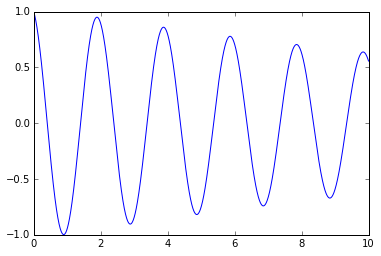

In [83]:
t, x, y=sdof_time_plot(m=10, c=1, k=100,x0=1,v0=-1, max_time=10)

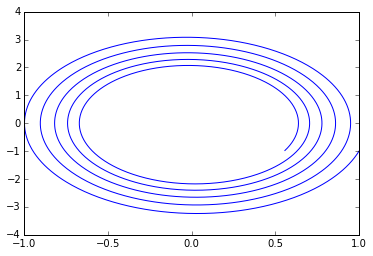

In [88]:
t, x, y=sdof_phase_plot(m=10, c=1, k=100,x0=1,v0=-1, max_time=10)

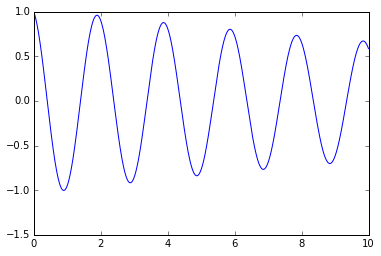

In [87]:
w = interactive(sdof_time_plot, max_time=(1.0,200.0), v0=(-100,100),m=(1.0,100.0),
                c=(0.0,1.0), x0=(-100,100),k=(1.0,100.0))
display(w)

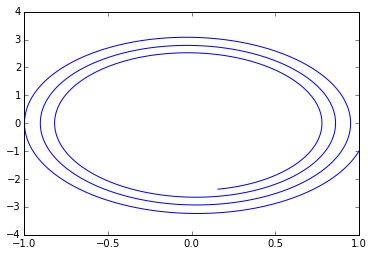

In [89]:
w = interactive(sdof_phase_plot, max_time=(1.0,200.0), v0=(-100,100),m=(1.0,100.0),
                c=(0.0,1.0), x0=(-100,100),k=(1.0,100.0))
display(w)

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [38]:
t, z_t = w.result

In [39]:
w.kwargs

{'c': 1.0, 'k': 74.7, 'm': 10.0, 'max_time': 10.0, 'v0': -1, 'x0': 1}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

In [41]:
xyz_avg = z_t.mean(axis=1)

In [42]:
xyz_avg.shape

(1, 2)

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

ValueError: x has only one data point. bins or range kwarg must be given

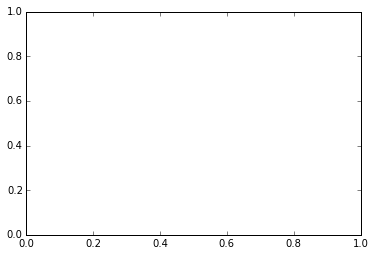

In [43]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$')

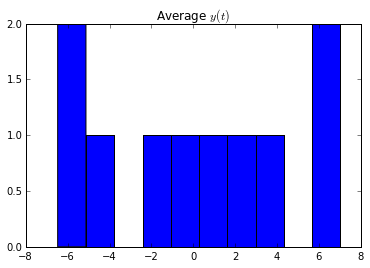

In [12]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')